# Training and Deployment
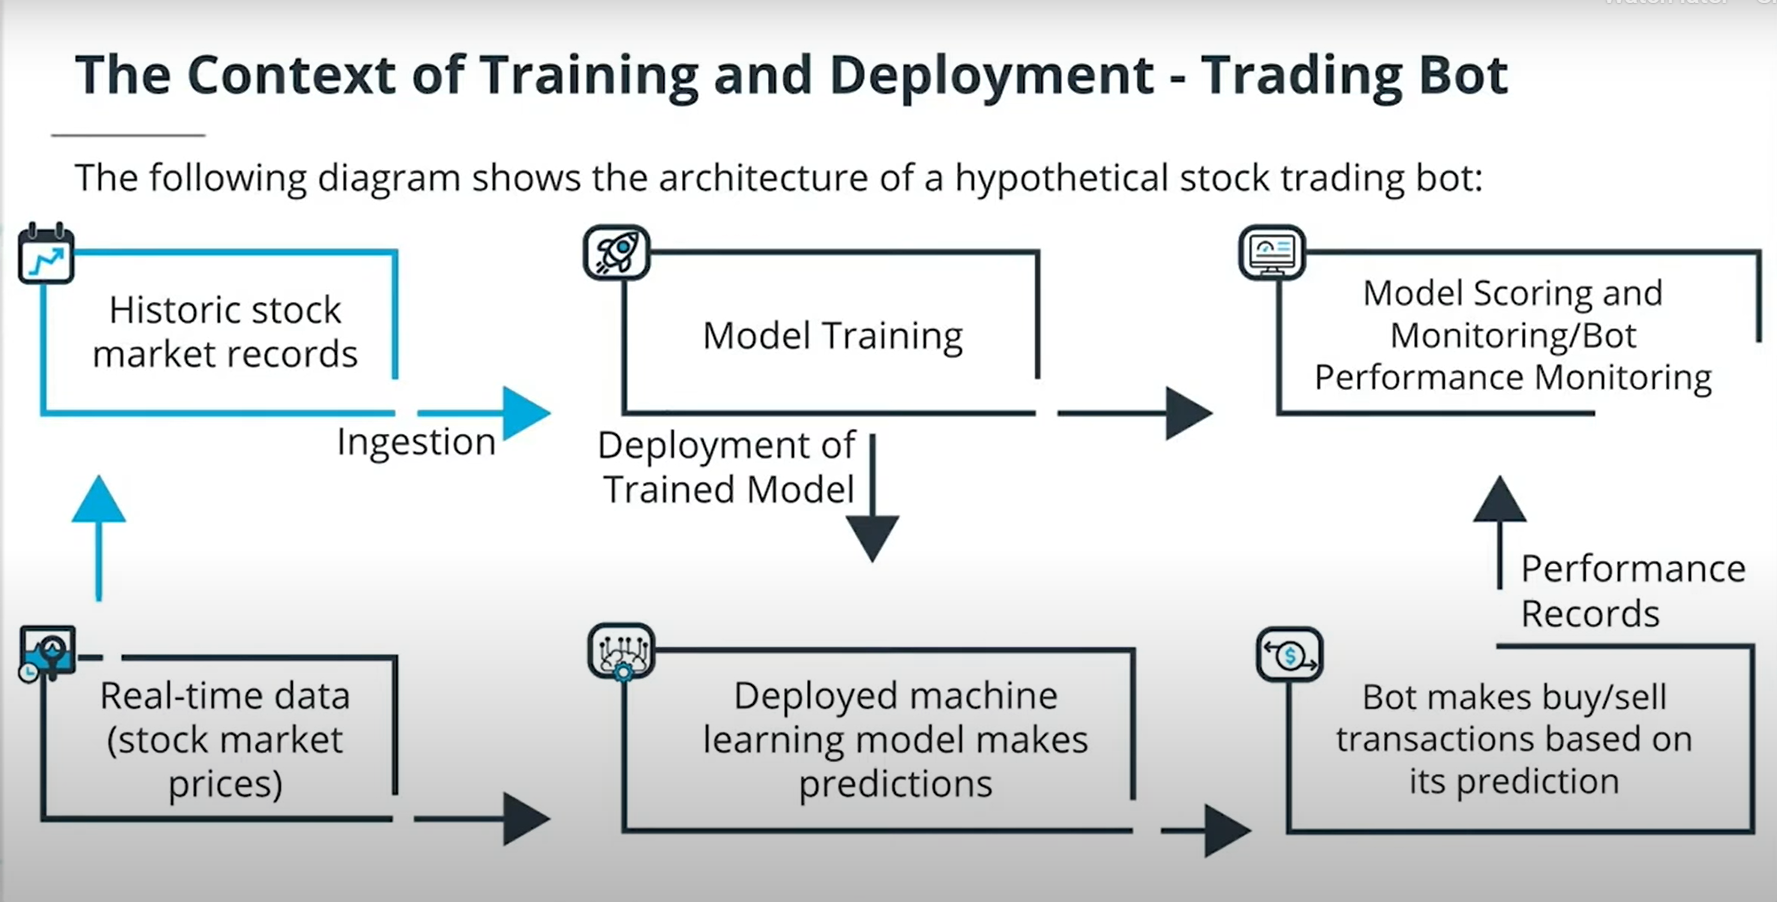

## 1- Data ingestion
Data ingestion is the term for the process of finding, gathering, recording, cleaning, and providing data as input to an ML project.

- First, you need to find data. Your data might be in several different places, in different formats, with different sizes and update frequencies.
- 
Next, you need to read your data into a Python script, and aggregate all source datasets into one, combined dataset

- 
You need to do de-duplication and cleani.g
- .
Finally, you need to write the dataset to a single output file or table.

#### Helpful functions

In [4]:
import os
os.getcwd() #  gets the current working directory, which will enable you to search for files on your workspace.
os.listdir() #generates a list of filenames in a particular directory. This will help you know which files to read during your ingestion process.

'E:\\ml_devops_nanodegree\\ml_model_scoring_monitoring'

#### Record keeping


As you're doing data ingestion, you should make sure to document the details of your process. The following are ingestion details you'll want to keep records of:

- The name and location of every file you read as a source.
- The date when you performed data ingestion.
- The datasets you worked with
- Other details about the data, maybe including how many duplicates you dealt with, and how many formatting changes you made.
- The name and location of the final output file you wrote.

In [ ]:
import pandas as pd
from datetime import datetime
sourcelocation='./recorddatasource/'
filename='recordkeepingdemo.csv'
outputlocation='records.txt'
data=pd.read_csv(sourcelocation+filename)
dateTimeObj=datetime.now()
thetimenow=str(dateTimeObj.year)+ '/'+str(dateTimeObj.month)+ '/'+str(dateTimeObj.day)
allrecords=[sourcelocation,filename,len(data.index),thetimenow]
MyFile=open(outputlocation,'w')
for element in allrecords:
     MyFile.write(str(element))

## 2- Cron Jobs

It's very likely that you'll want to schedule Python scripts to run automatically at regular intervals. If you're using a Linux machine
you can accomplish this using your machine's crontab file.

A crontab file contains rows of simple commands called cron jobs. Every cron job schedules a particular job or script to run at a particular regular interval. Cron jobs can run Python scripts, or any other command that can be run from the Linux command line.

Cron jobs are so important because they enable automation, and they reduce the manual intervention required in ML projects

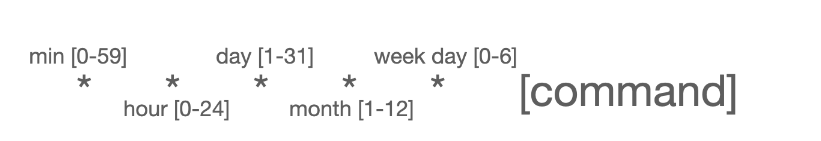

In [ ]:
service cron start
crontab -e # open crontab file 
 ***  * * python /home/workspace/L2/demo1/crondemo.py #The following cron job will run every minute of every day:
59 12 5 1 * python /home/workspace/L2/demo1/crondemo.py #The following cron job will run at 12:59 on January 5, just once per year:
59  ***   5 python /home/workspace/L2/demo1/crondemo.py #The following cron job will run on Fridays, once per hour at 59 minutes past every hour:

## 3- Training and deployment

Re-training and re-deployment are important parts of every ML project. Take a look at the image below, showing a map of a full ML project. It shows data ingestion in the top left - this is something we did in the first part .
Training and deployment are shown in the middle of the top row - they're the steps we want to talk about now.
We accomplish training just after ingestion. Training requires you to know the location of ingested training data, create an ML model, and fit the model using the training data.

After training, you can accomplish deployment. Often, deployment is a simple process, that requires saving a trained model to a production environment.





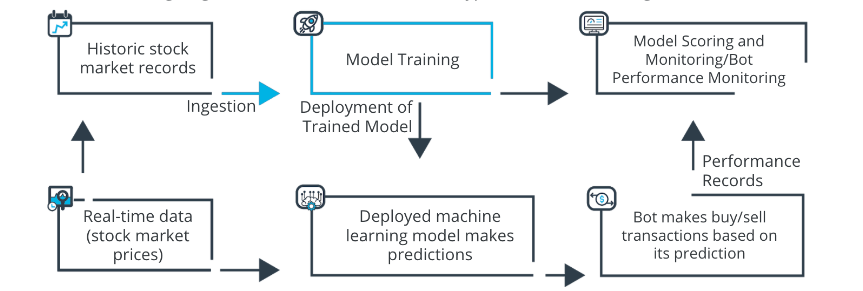

### Model drift

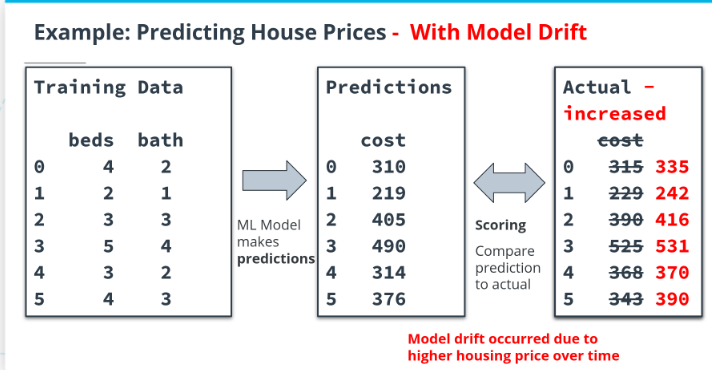rse.



We train ML models to make sure they're as accurate as possible. But usually, model performance gets worse as models get older. There are a few things that can cause model performance to decrease over time:

- Changes in the target variable: in the example illustrated above, you can see a hypothetical ML model predicting house prices. When prices change, as they do almost constantly, a previously trained model will become less accurate, and obsolete.

- Changes in the predictor variable: if the model was trained to predict prices of houses with 2 or 3 bedrooms, but builders start to build houses with 4 or 5 bedrooms, it's possible that the model will perform worse because the predictor variable is outside the range where the model was trained.

- Changes in the relationship between predictor and target: many factors, such as utility prices, changing tastes, and new technology, can cause the relationship between predictors and targets to change, which can make models perform worse.

**Thats why you will need to continuously rescore your model every time interval with new data to check for model drift**

### Recording model score
Recording model scores is a straightforward process:

- First, read historical records into your Python session.
- Next, perform model scoring, as we went over earlier in this lesson. Make sure the score you calculate is the same type of score as the scores in your historical records. Also, make sure you use the most recently deployed ML model to calculate scores.

- Finally, write a record of all previous and current scores to your workspace.

### Checking for model drift : Raw comparison

The simplest way to compare performance is a "raw comparison": we simply check whether current performance is worse than all previous scores. if the current performance score is worse than all previous scores, then we say that model drift has occurred - according to the raw comparison test.

In [ ]:
firsttest = newf1 < np.min(f1list)

### Checking for model drift : Parametric Significance Test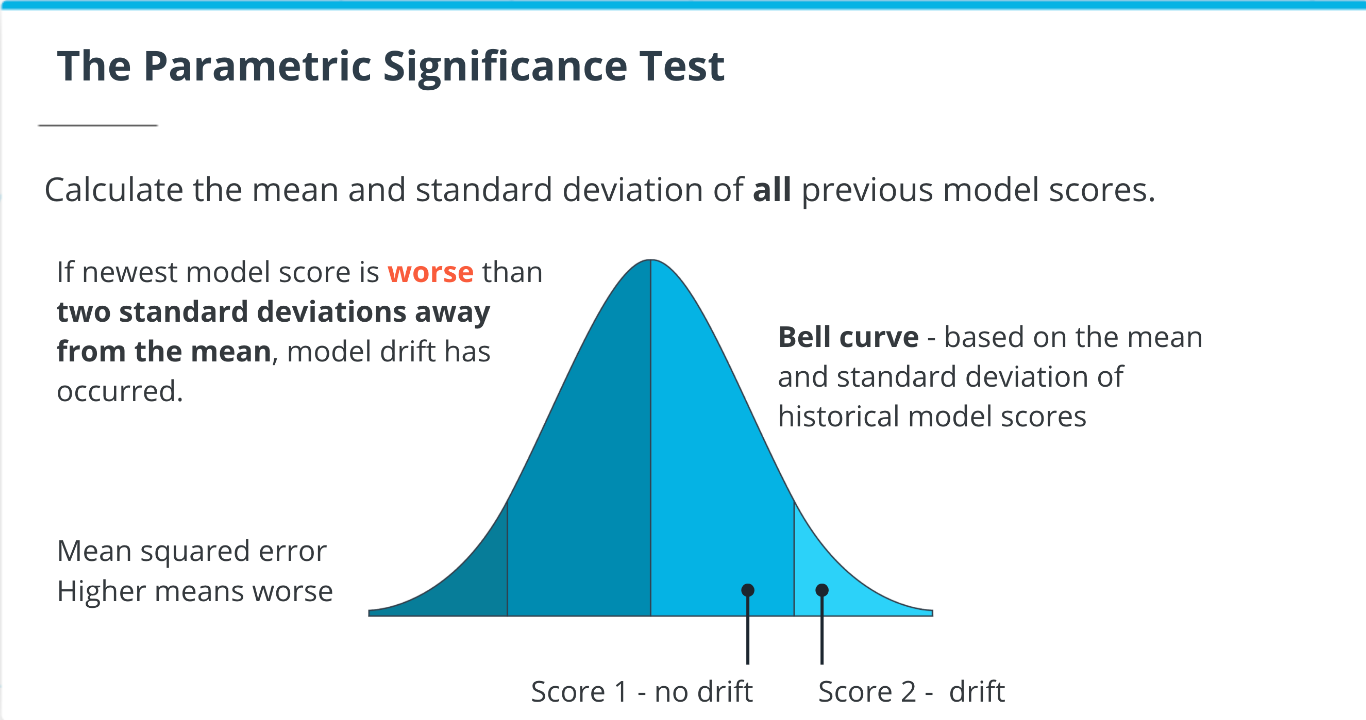




In [ ]:
secondtest = newf1 < np.mean(f1list)-2*np.std(f1list)
print(secondtest)

### Checking for model drift : Non-Parametric Outlier Test

If a model score is worse than previous scores to an extent that it's an outlier (either a high or low outlier), then the non-parametric outlier test concludes that model drift has occurred
- more than 1.5 interquartile ranges above the 75th percentile (a high outlier)
- more than 1.5 interquartile ranges below the 25th percentile (a low outlier).


In [ ]:
iqr = np.quantile(f1list, 0.75)-np.quantile(f1list, 0.25)
thirdtest = newf1 < np.quantile(f1list, 0.25)-iqr*1.5
print(thirdtest)

### Hypothesis testing

### API
In order to configure an API, you need to create a Python script. It's common to call this script app.py. These are the things you need to accomplish in your app.py script:

- import needed capabilities from the flask module.
- instantiate the app using the Flask() command.
- specify an endpoint for users to interact with.
- run the app using the run() method, specifying a host and a port.

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    number = request.args.get('number')
    return str(int(number)+1)+'\n'

app.run(host='0.0.0.0', port=8000)

You can call the api using 

`root$ curl http://0.0.0.0:8000/?number=1`

You can have multiple routes

```python
@app.route('/medians')
def summary():
    filename = request.args.get('filename')  
    thedata=readpandas(filename)
    return str(thedata.median(axis=0))
```

and you can call it using

`root$ curl http://0.0.0.0:8000/medians?number=1`


`*

#### Api calling
You can call the api using the following methods 

##### **From the command line**
You need to use the curl command to call API's from the terminal's command line. WHen you use curl, you need to specify 3 things to call an API:

- An IP address or URL, like 127.0.0.1. This IP address is called the localhost IP: it always accesses the current machine where your code is running.
- A port number, like 8000. This needs to be the same port that is mentioned in your app.py configuration file.
- A query string: this is any string that you want to pass to your API to specify an endpoint and any argument your API endpoint needs

Example : `curl 127.0.0.1:8000?user=brad`


##### **From python script**
You can also call your API's from within a Python script. Just like a command line API call, you need to specify three important things:

- an IP address or URL, like 127.0.0.1. This IP address is called the localhost IP: it always accesses the current machine where your code is running.
- a port number, like 8000. This needs to be the same port that is mentioned in your app.py configuration file.
- a query string: this is any string that you want to pass to your API to specify an endpoint and any argument your API endpoint needs

Example 
```python
print(requests.get('http://127.0.0.1:8000?user=brad').content)
```

##### **Hybrid Method: Terminal Commands From Python Scripts**
Finally, you can use a hybrid method: calling the command line from within a Python script. Just like you needed in the previous methods, you'll need to specify all of these 3 things in your API call

Example 
```python
import subprocess
response1=subprocess.run(['curl', '127.0.0.1:8000?user=brad'],capture_output=True).stdout
```